In [97]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline


In [98]:
url = 'https://gist.githubusercontent.com/zgulde/96991fedca29ff5371f5e7fa00d3fa95/raw/343eae8826deccf3766535d549151d47fdd8d6f5/the_data.csv'

In [99]:
df_orig =  pd.read_csv(url,          
                 engine='python',
                 header=0,
                 index_col=False,
                 sep=',',
                 na_values='"-"')

In [100]:
df = df_orig.copy()

In [101]:
df

,timestamp,x,y
0,2018-04-30 00:00:00,1.84,A
1,2018-04-30 01:00:00,1.47,C
2,2018-04-30 02:00:00,0.20,B
3,2018-04-30 03:00:00,0.17,C
4,2018-04-30 04:00:00,2.06,C
5,2018-04-30 05:00:00,0.74,B
6,2018-04-30 06:00:00,-0.77,A
7,2018-04-30 07:00:00,0.98,C
8,2018-04-30 08:00:00,0.18,A
9,2018-04-30 09:00:00,-1.02,A


In [102]:
df.dtypes

timestamp     object
x            float64
y             object
dtype: object

In [103]:
df.timestamp = pd.to_datetime(df.timestamp)

In [104]:
df.dtypes

timestamp    datetime64[ns]
x                   float64
y                    object
dtype: object

# By Group



In [105]:
grB = df[(df['y'] == 'B')]
grB


,timestamp,x,y
2,2018-04-30 02:00:00,0.20,B
5,2018-04-30 05:00:00,0.74,B
12,2018-04-30 12:00:00,-2.05,B
14,2018-04-30 14:00:00,-0.36,B
20,2018-04-30 20:00:00,1.21,B
21,2018-04-30 21:00:00,-0.81,B
22,2018-04-30 22:00:00,1.89,B
24,2018-05-01 00:00:00,-2.05,B
30,2018-05-01 06:00:00,-1.61,B
31,2018-05-01 07:00:00,0.21,B


### What is the maximum x value for group B?

In [106]:
grB.max()[1]

1.91

### What is the average x value for group A?


In [107]:
grA = df[(df['y'] == 'A')]

In [108]:
grA.max()[1]

1.84

In [109]:
grA

,timestamp,x,y
0,2018-04-30 00:00:00,1.84,A
6,2018-04-30 06:00:00,-0.77,A
8,2018-04-30 08:00:00,0.18,A
9,2018-04-30 09:00:00,-1.02,A
13,2018-04-30 13:00:00,1.25,A
15,2018-04-30 15:00:00,1.42,A
16,2018-04-30 16:00:00,-0.32,A
18,2018-04-30 18:00:00,-1.11,A
19,2018-04-30 19:00:00,0.17,A
23,2018-04-30 23:00:00,-0.94,A


### What is the minimum x value for group C?


In [110]:
grC = df[(df['y'] == 'C')]

In [111]:
grC.max()[1]

2.06

In [112]:
grC

,timestamp,x,y
1,2018-04-30 01:00:00,1.47,C
3,2018-04-30 03:00:00,0.17,C
4,2018-04-30 04:00:00,2.06,C
7,2018-04-30 07:00:00,0.98,C
10,2018-04-30 10:00:00,-1.07,C
11,2018-04-30 11:00:00,-0.13,C
17,2018-04-30 17:00:00,0.28,C
28,2018-05-01 04:00:00,0.64,C
34,2018-05-01 10:00:00,1.21,C
35,2018-05-01 11:00:00,-1.59,C


### Which group has the highest sum of x values?


In [113]:
grB.x.sum()

-0.7000000000000002

In [114]:
grA.x.sum()

-1.99

In [115]:
grC.x.sum()

3.95

In [141]:
df.groupby('y').agg(['max','mean','min','sum'])

x                      
    max      mean   min   sum
y                            
A  1.84 -0.110556 -1.30 -1.99
B  1.91 -0.053846 -2.05 -0.70
C  2.06  0.232353 -1.83  3.95

# Time Aggregates

### What is the least frequent y value for 2018-04-30?


In [144]:
df.dtypes

x    float64
y     object
dtype: object

In [ ]:
df.set_index('timestamp', inplace=True)

In [146]:
df.dtypes

x    float64
y     object
dtype: object

In [148]:
df['2018-04-30']

,x,y
timestamp,,
2018-04-30 00:00:00,1.84,A
2018-04-30 01:00:00,1.47,C
2018-04-30 02:00:00,0.20,B
2018-04-30 03:00:00,0.17,C
2018-04-30 04:00:00,2.06,C
2018-04-30 05:00:00,0.74,B
2018-04-30 06:00:00,-0.77,A
2018-04-30 07:00:00,0.98,C
2018-04-30 08:00:00,0.18,A


In [155]:
df['2018-04-30'].y.value_counts().min()

7

In [160]:
df.groupby([df.index.date, 'y']).count()

x
           y    
2018-04-30 A  10
           B   7
           C   7
2018-05-01 A   8
           B   6
           C  10

### What is the most frequent y value for each day?


### What is the sum of the x values for 2018-05-01?
### What is the average x value for each day? The median?

In [150]:
df['2018-04-30'].x.sum()

5.279999999999999

In [158]:
df.resample('D').sum()

,x
timestamp,
2018-04-30,5.28
2018-05-01,-4.02


In [159]:
df.resample('D').agg(['sum','mean','median'])

x               
             sum    mean median
timestamp                      
2018-04-30  5.28  0.2200  0.175
2018-05-01 -4.02 -0.1675  0.220

# Visualization

### Visualize the minimum x value of each group with a bar chart.
### Visualize x over time.
### Visualize x over time by y value.

In [164]:
df.groupby('y').min()

,x
y,
A,-1.30
B,-2.05
C,-1.83


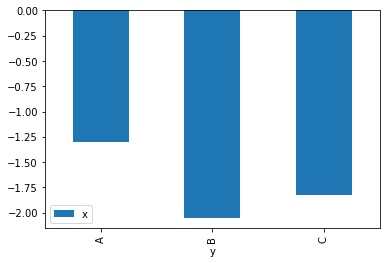

In [171]:
df.groupby('y').min().plot.bar()
plt.show()

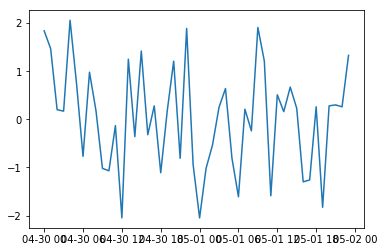

In [163]:
plt.plot(df.x)

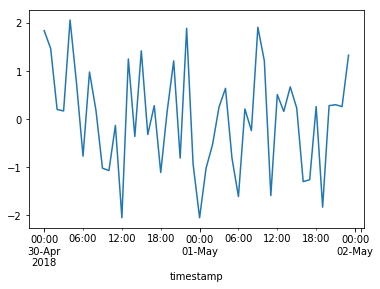

In [172]:
df.x.plot()
plt.show()

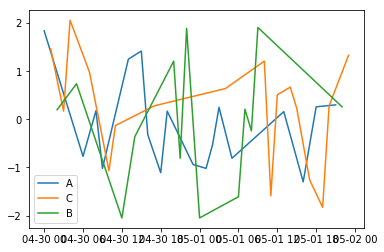

In [176]:
for group in df.y.unique():
    data= df[df.y == group]
    plt.plot(data.index, data.x, label=group)
    plt.legend()